In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv("data/mnist/train.csv").as_matrix()

clf = DecisionTreeClassifier()

# training dataset

xtrain = data[0:21000, 1:]
train_label = data[0:21000, 0]

clf.fit(xtrain, train_label)

#testing data

xtest = data[21000:, 1:]
actual_label = data[21000:,0]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


('Actual Label:', 1)
('Predicted Label:', array([1]))


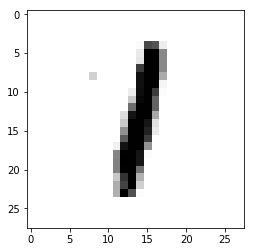

In [49]:
val = 100


d = xtest[val]
d.shape = (28,28)

plt.imshow(255-d, cmap='gray')

print('Actual Label:', actual_label[val])
print('Predicted Label:', clf.predict([xtest[val]]))

plt.show()

In [26]:
from sklearn.metrics import accuracy_score

preds = clf.predict(xtest)
# Evaluate accuracy
print(accuracy_score(actual_label, preds))

0.8365714285714285


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00784313725490196, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00392156862745098, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00392156862745098, 0.0196078431372549, 0.0, 0.0, 0.0, 0

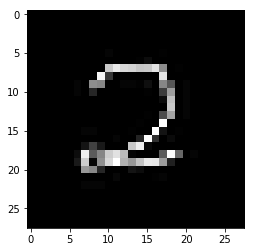

In [55]:
from PIL import Image, ImageFilter
from matplotlib import pyplot as plt


def imageprepare(argv):
    """
    This function returns the pixel values.
    The imput is a png file location.
    """
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas

    # newImage.save("sample.png

    tv = list(newImage.getdata())  # get pixel values

    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]
    #print(tva)
    return tva

x=[imageprepare('data/img/two.png')]#file path here

print((x[0]))

print(len(xtest[0]))

print(clf.predict([x[0]]))

d = np.array(x[0])
d.shape = (28,28)

plt.imshow(d, cmap='gray')

In [3]:
from sklearn import datasets
from sklearn.svm import SVC
from scipy import misc


digits = datasets.load_digits()
features = digits.data 
labels = digits.target

clf = SVC(gamma = 0.001)
clf.fit(features, labels)


img = misc.imread("data/img/2.jpg")
img = misc.imresize(img, (8,8))
img = img.astype(digits.images.dtype)
img = misc.bytescale(img, high=16, low=0)


x_test = []

for eachRow in img:
    for eachPixel in eachRow:
        x_test.append(sum(eachPixel)/3.0)

print(x_test)

print(clf.predict([x_test]))

[0.0, 0.0, 4.0, 9.0, 11.0, 10.0, 2.0, 0.0, 0.0, 7.0, 9.0, 3.0, 1.0, 4.0, 4.0, 0.0, 0.0, 7.0, 0.0, 0.0, 0.0, 3.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 6.0, 1.0, 0.0, 0.0, 1.0, 4.0, 10.0, 12.0, 6.0, 5.0, 3.0, 2.0, 10.0, 16.0, 9.0, 4.0, 4.0, 4.0, 6.0, 3.0]
[2]


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `bytescale` is deprecated!
`bytescale` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
